# 第三章　 暖冷房負荷と外皮性能 / Chapter 3 Heating and cooling load and envelope performance

## 第二節　外皮性能 / Section 3  Envelope performance

## 試算例

### 初期条件

In [1]:
def get_default_ENV():
    
    # 基本情報
    house_base = {'type': '一般住宅', "evaluation_method": "住戸全体を対象に評価する",
                  'tatekata': '戸建住宅',"region": 6, "A_A": 120.08, "A_MR": 29.81, "A_OR": 51.34}

    # 外皮
    house_ENV = {"A_env": 307.51, "U_A": 0.87, "eta_A_H": 4.3, "eta_A_C": 2.8, 
                 'method': '当該住宅の外皮面積の合計を用いて評価する'}
    
    return house_base, house_ENV


### 計算

In [2]:
def calc_results_insulation_performance(house_base, house_ENV):

    from pyhees.section3_2 import calc_insulation_performance
    from pyhees.section3_1 import get_Q
    import pyhees.section2_2_a as sc2_2_a
    import pyhees.section2_5_a as sc2_5_a


    # ---- 外皮の計算 ----
    evaluation_method = house_base['evaluation_method']
    if evaluation_method == '住戸全体を対象に評価する':
        A_A, A_MR, A_OR         = sc2_2_a.get_A(house_base)
        U_A, eta_A_H, eta_A_C   = sc2_2_a.get_U_A_and_eta_A(house_base['tatekata'], house_base['region'], house_ENV)
    elif evaluation_method == '増改築部分を対象に評価する':
        A_A, A_MR, A_OR         = sc2_5_a.get_A(house_base['tatekata'])
        U_A, eta_A_H, eta_A_C   = sc2_5_a.get_U_A_and_eta_A(house_base['tatekata'], house_base['region'], house_ENV)
    else:
        raise ValueError(evaluation_method)

    method = house_ENV.get('method', None)
    A_env  = house_ENV.get('A_env',  None)
    r_env, Q_dash, mu_H, mu_C = calc_insulation_performance(house_base['tatekata'], method, A_env, A_A, U_A, eta_A_H, eta_A_C)
    # 外皮の断熱性能の計算
    if house_ENV is not None:
        # 熱損失係数
        Q = get_Q(Q_dash)
    else:
        Q = None
        mu_H, mu_C = None, None

    print(f'U_A={U_A}, eta_A_H={eta_A_H}, eta_A_C={eta_A_C}')
    print(f'Q={Q}, mu_H={mu_H}, mu_C={mu_C}')

    return U_A, eta_A_H, eta_A_C, Q, mu_H, mu_C

### 計算条件1

- 初期条件での計算

In [3]:
house_base, house_ENV = get_default_ENV()
resENV01 = calc_results_insulation_performance(house_base, house_ENV)


U_A=0.87, eta_A_H=4.3, eta_A_C=2.8
Q=2.647962191872085, mu_H=0.11011767155229846, mu_C=0.07170453031312457


### 計算条件2

- UA値0.56、ηAH値2.5、ηAC値2に変更

In [4]:
house_base, house_ENV = get_default_ENV()
house_ENV['U_A'] = 0.56
house_ENV['eta_A_H'] = 2.5
house_ENV['eta_A_C'] = 2
resENV02 = calc_results_insulation_performance(house_base, house_ENV)


U_A=0.56, eta_A_H=2.5, eta_A_C=2
Q=1.8540906062624918, mu_H=0.0640219020652898, mu_C=0.05121752165223185


### 計算条件3

- 仕様基準により外皮性能を評価する
- 戸建住宅

In [5]:
house_base, house_ENV = get_default_ENV()
house_ENV['method'] = '仕様基準により外皮性能を評価する方法'
resENV03 = calc_results_insulation_performance(house_base, house_ENV)

U_A=0.87, eta_A_H=4.3, eta_A_C=2.8
Q=2.647962191872085, mu_H=0.11011767155229846, mu_C=0.07170453031312457


### 計算条件4

- 仕様基準により外皮性能を評価する
- 共同住宅

In [6]:
house_base, house_ENV = get_default_ENV()
house_base['tatekata'] = '共同住宅'
house_ENV['method'] = '仕様基準により外皮性能を評価する方法'
resENV04 = calc_results_insulation_performance(house_base, house_ENV)

U_A=0.72, eta_A_H=2.1, eta_A_C=1.4
Q=2.870262857142857, mu_H=0.071466, mu_C=0.04764399999999999


### 計算条件5

- 誘導仕様基準により外皮性能を評価する方法（住戸全体を対象に評価）
- 戸建住宅

In [7]:
house_base, house_ENV = get_default_ENV()
house_ENV['method'] = '誘導仕様基準により外皮性能を評価する方法（住戸全体を対象に評価）'
resENV05 = calc_results_insulation_performance(house_base, house_ENV)

U_A=0.6, eta_A_H=3.0, eta_A_C=1.7
Q=1.9565256495669552, mu_H=0.07682628247834776, mu_C=0.04353489340439707


### 計算条件6

- 誘導仕様基準により外皮性能を評価する方法（住戸全体を対象に評価）
- 共同住宅

In [8]:
house_base, house_ENV = get_default_ENV()
house_base['tatekata'] = '共同住宅'
house_ENV['method'] = '誘導仕様基準により外皮性能を評価する方法（住戸全体を対象に評価）'
resENV06 = calc_results_insulation_performance(house_base, house_ENV)

U_A=0.5, eta_A_H=1.7, eta_A_C=1.1
Q=2.1215714285714284, mu_H=0.057853428571428576, mu_C=0.03743457142857143


### 計算条件7

- 地域区分：2地域
- 誘導仕様基準により外皮性能を評価する方法（住戸全体を対象に評価）
- 共同住宅

In [9]:
house_base, house_ENV = get_default_ENV()
house_base['region'] = 2
house_base['tatekata'] = '共同住宅'
house_ENV['method'] = '誘導仕様基準により外皮性能を評価する方法（住戸全体を対象に評価）'
resENV07 = calc_results_insulation_performance(house_base, house_ENV)

U_A=0.34, eta_A_H=1.2, eta_A_C=0.9
Q=1.5770685714285715, mu_H=0.04083771428571428, mu_C=0.030628285714285716


### 計算条件8

- 地域区分：4地域
- 住戸の評価方法：増改築部分を対象に評価する
- 仕様基準により外皮性能を評価する方法

In [10]:
house_base, house_ENV = get_default_ENV()
house_base['region'] = 4
house_base['evaluation_method'] = '増改築部分を対象に評価する'
house_ENV['method'] = '仕様基準により外皮性能を評価する方法'
resENV08 = calc_results_insulation_performance(house_base, house_ENV)

U_A=0.75, eta_A_H=3.7, eta_A_C=2.7
Q=2.340657061958694, mu_H=0.09475241505662892, mu_C=0.069143654230513


### 計算条件9

- 地域区分：4地域
- 住戸の評価方法：増改築部分を対象に評価する
- 誘導仕様基準により外皮性能を評価する方法（増改築部分を対象に評価）
- - UA値0.7、ηAH値3、ηAC値2.5に変更

In [11]:
house_base, house_ENV = get_default_ENV()
house_base['evaluation_method'] = '増改築部分を対象に評価する'
house_ENV['method'] = '誘導仕様基準により外皮性能を評価する方法（増改築部分を対象に評価）'
house_ENV['U_A'] = 0.7
house_ENV['eta_A_H'] = 3
house_ENV['eta_A_C'] = 2.5
resENV09 = calc_results_insulation_performance(house_base, house_ENV)

U_A=0.7, eta_A_H=3, eta_A_C=2.5
Q=2.2126132578281146, mu_H=0.07682628247834776, mu_C=0.0640219020652898


## 試算例の比較

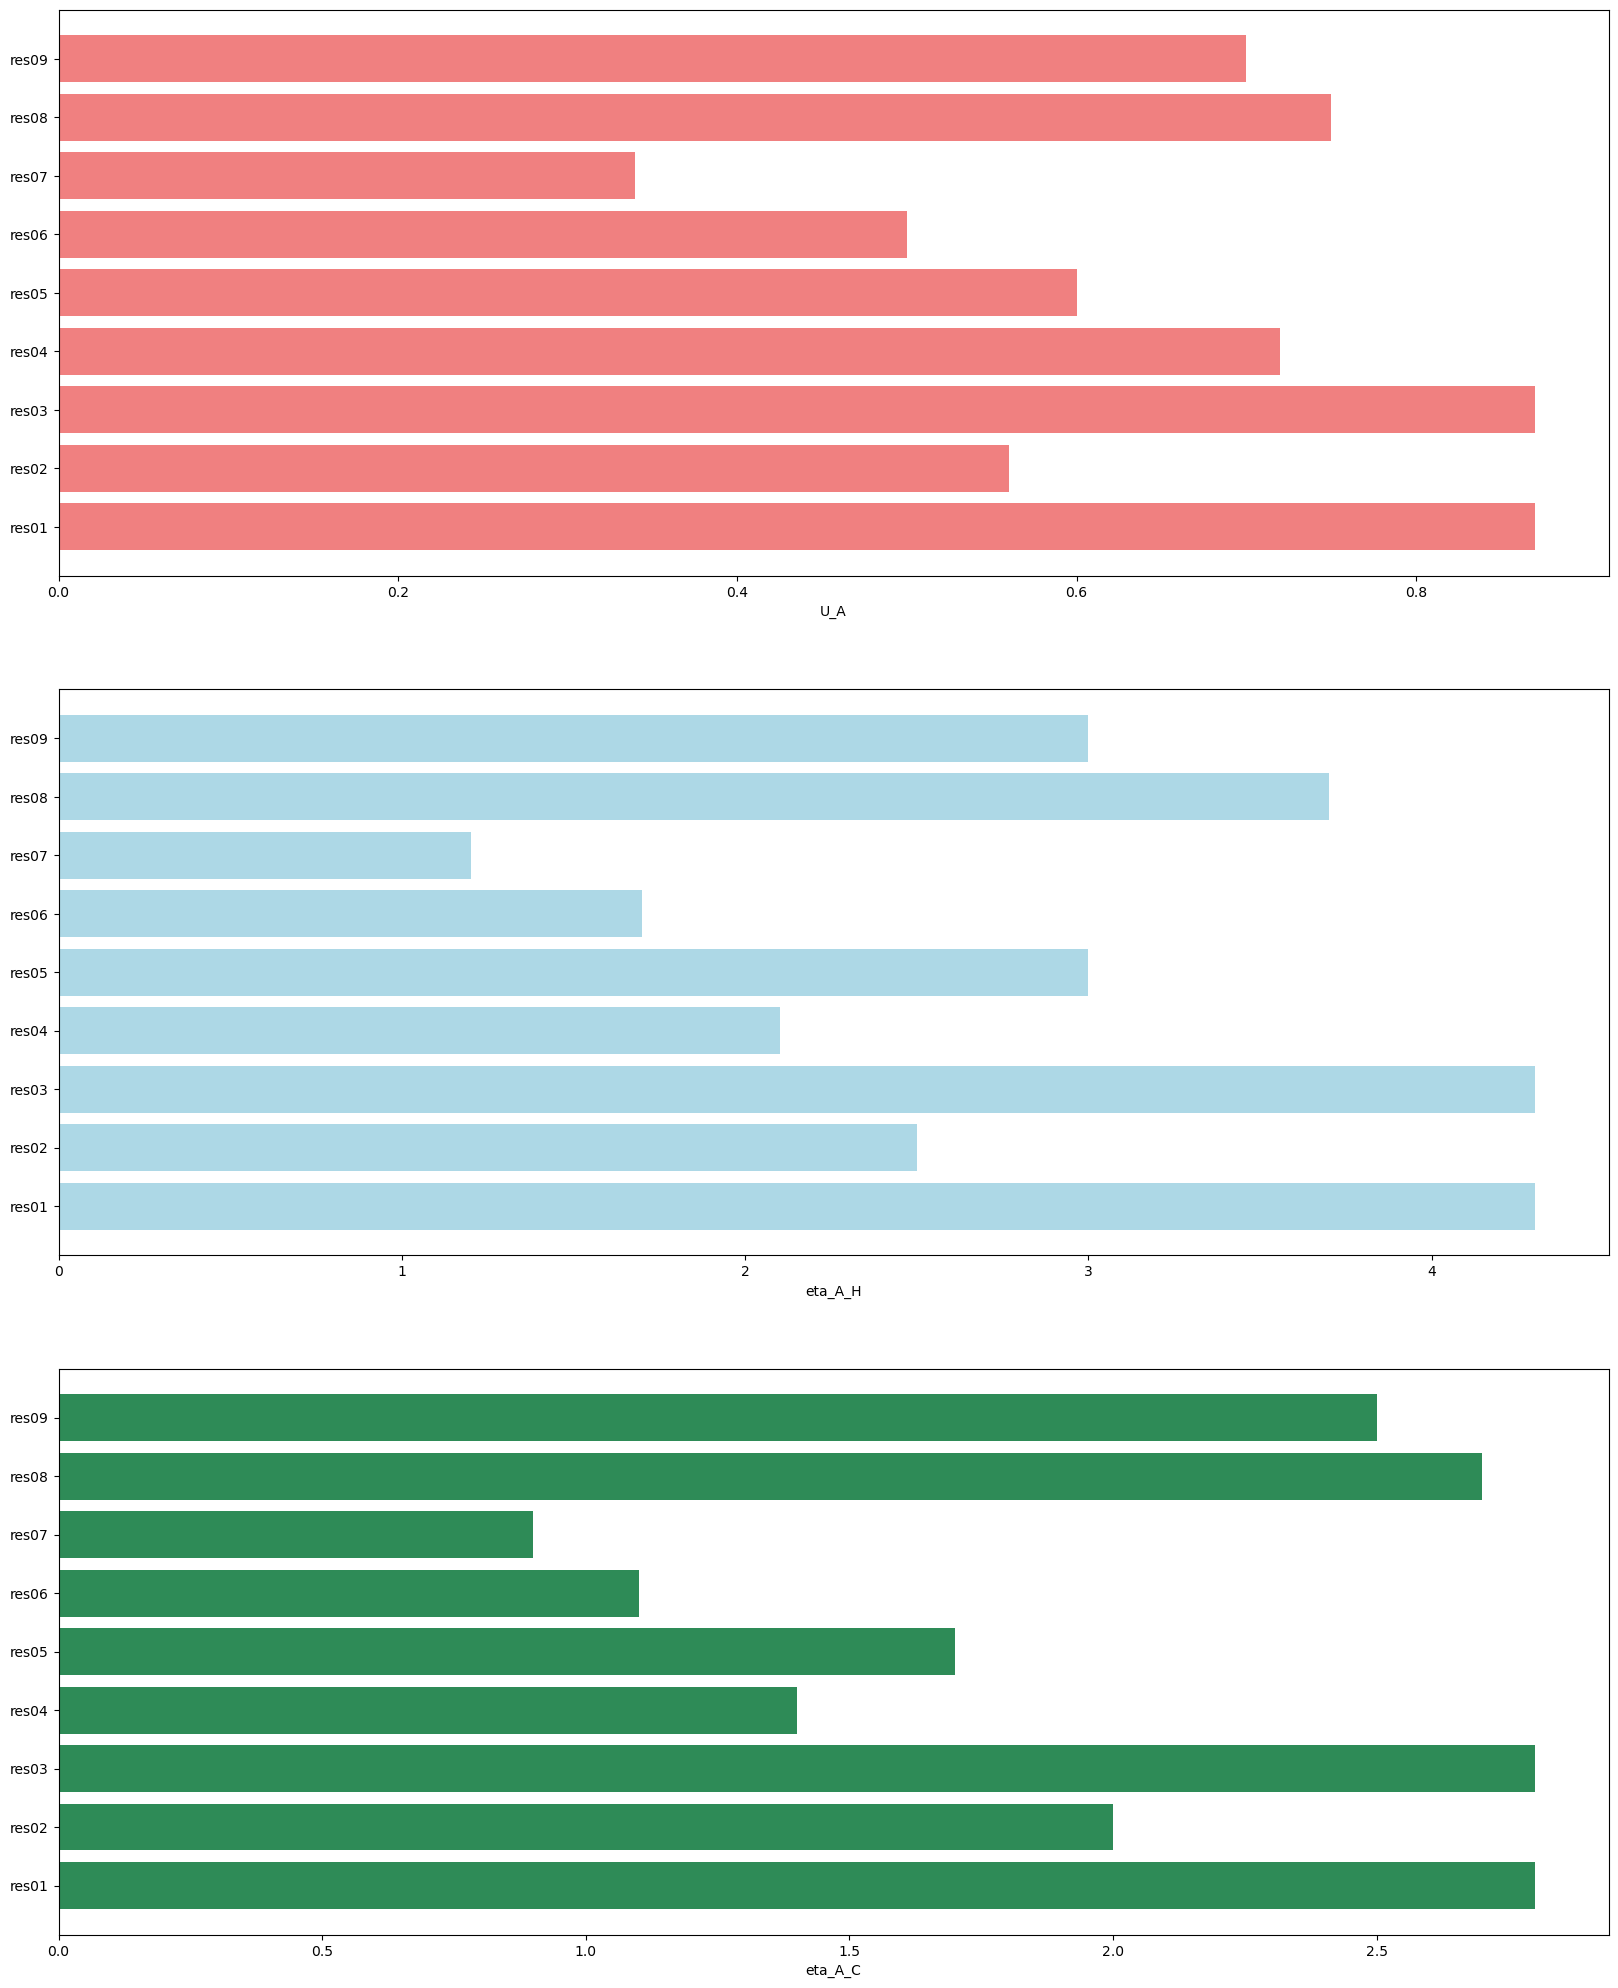

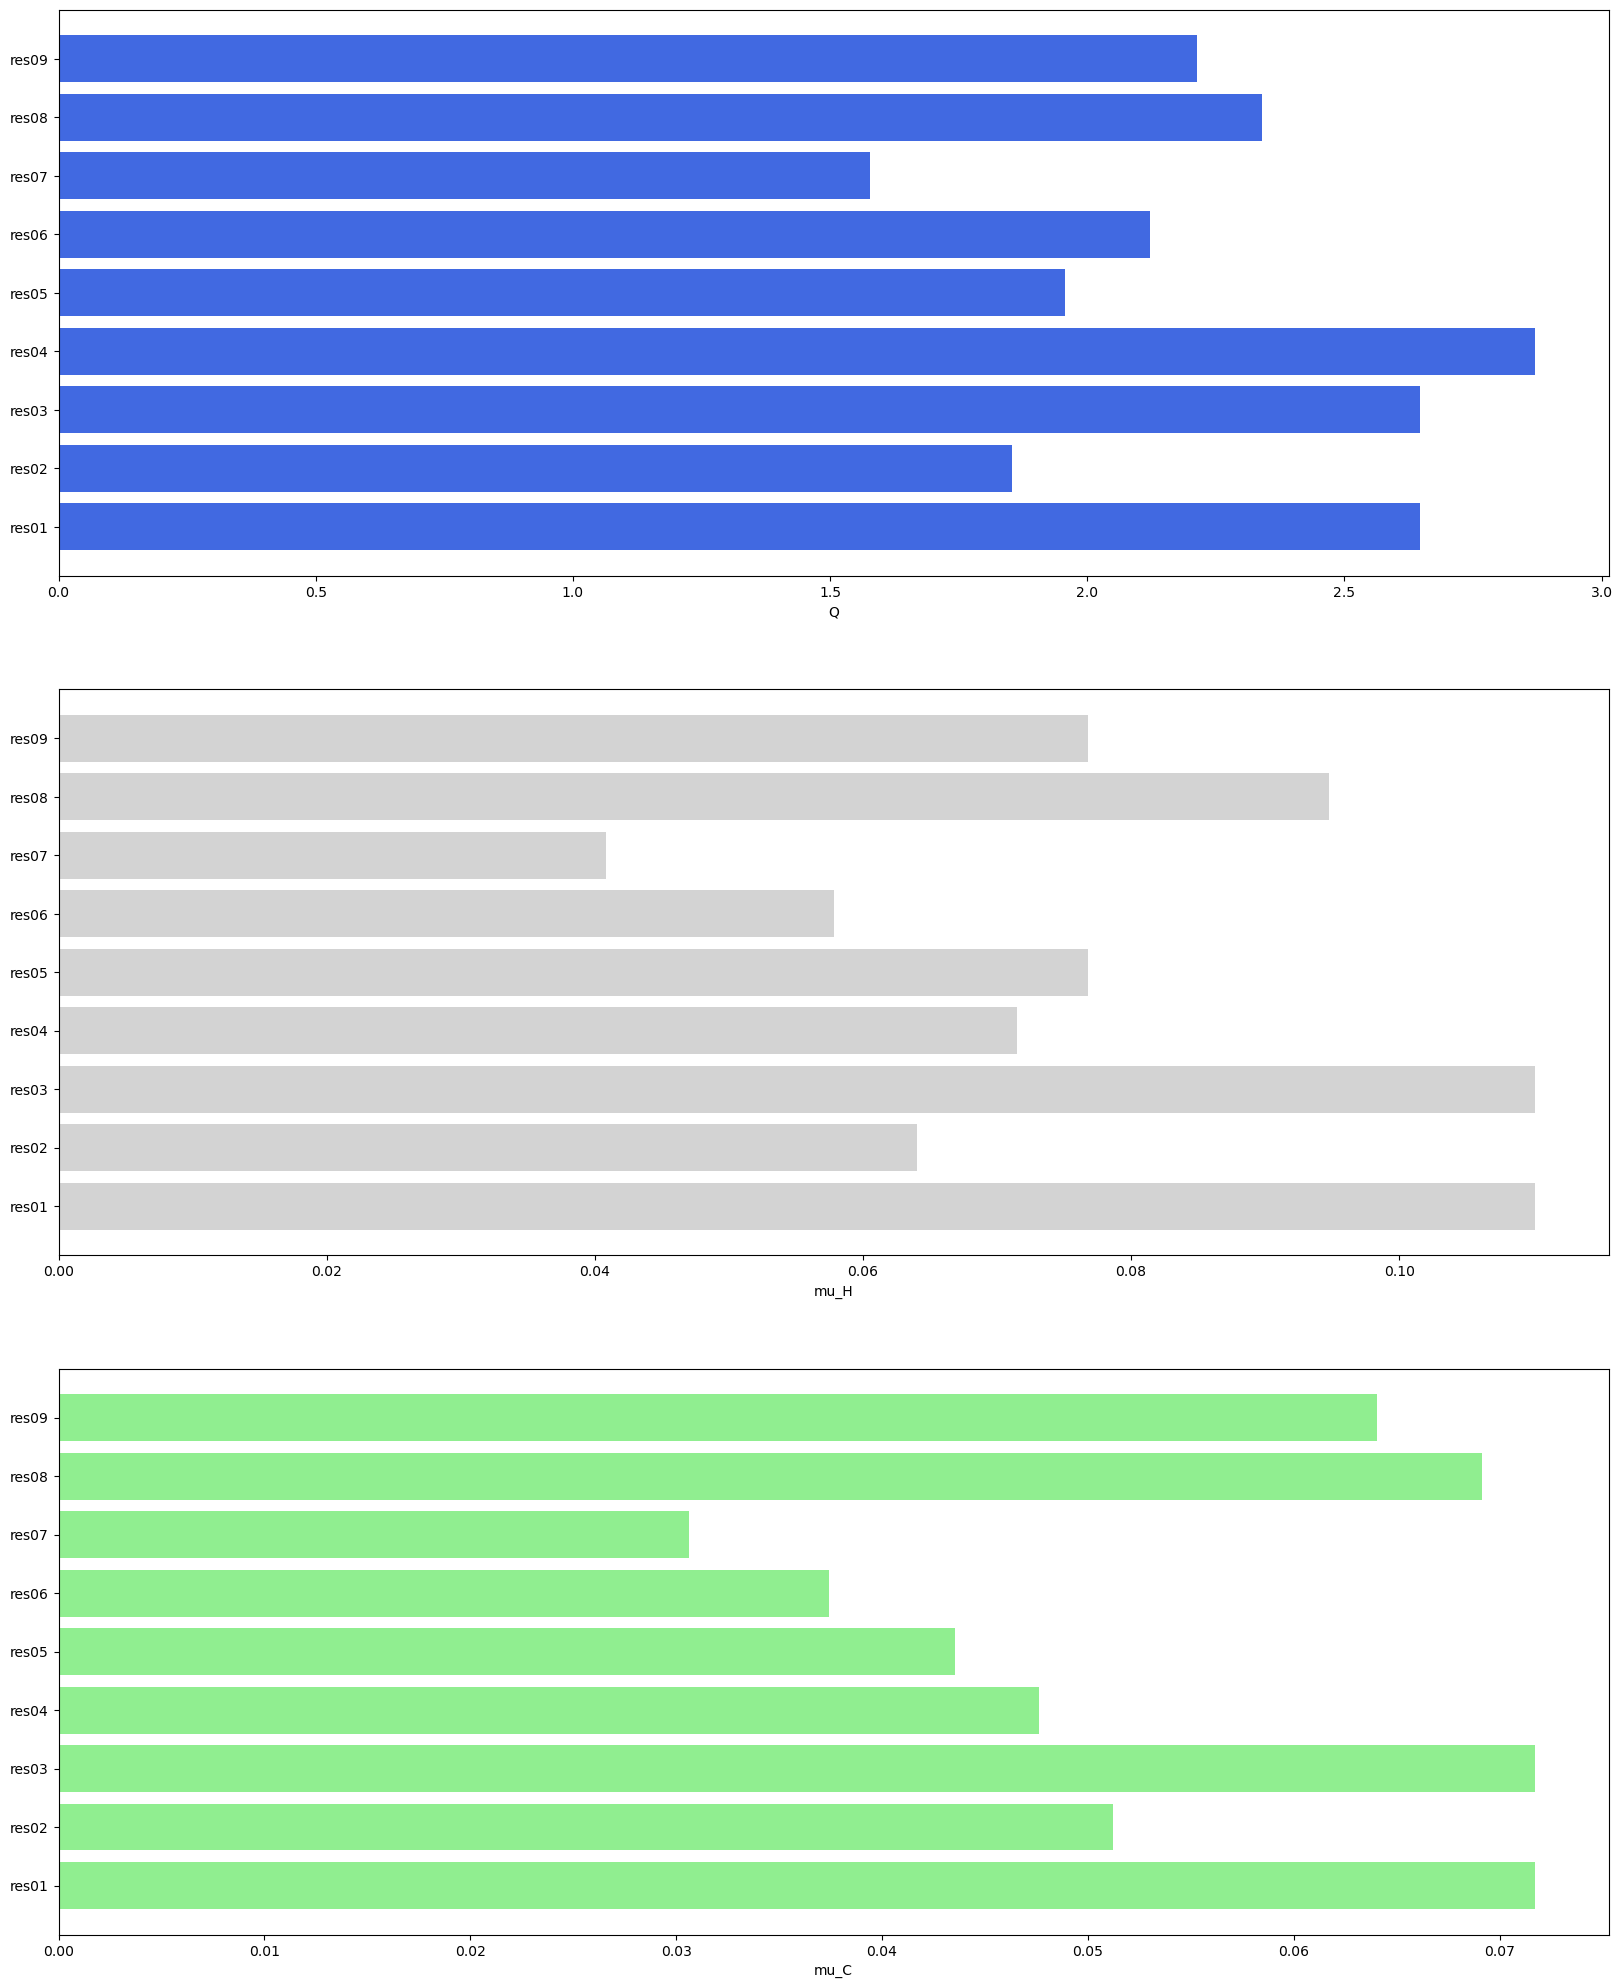

In [12]:
import matplotlib.pyplot as plt

param_names = ["U_A", "eta_A_H", "eta_A_C", "Q", "mu_H", "mu_C"]
grh_colors = ['lightcoral', 'lightblue', 'seagreen', 'royalblue', 'lightgray', 'lightgreen']

# U_A, eta_A_H, eta_A_C
fig = plt.figure(figsize=(20,25))
for i in range(0, 3):
    dat = {"res01": resENV01[i], "res02": resENV02[i], "res03": resENV03[i], "res04": resENV04[i], "res05": resENV05[i],
           "res06": resENV06[i], "res07": resENV07[i], "res08": resENV08[i],"res09": resENV09[i]}

    x = list(dat.keys())
    y = list(dat.values())

    grh = fig.add_subplot(int(f"31{i+1}"))
    grh.barh(x,y, color = grh_colors[i])
    grh.set_xlabel(param_names[i])


# Q, mu_H, mu_C
fig = plt.figure(figsize=(20,25))
for i in range(0, 3):
    dat2 = {"res01": resENV01[i+3], "res02": resENV02[i+3], "res03": resENV03[i+3], "res04": resENV04[i+3], "res05": resENV05[i+3], 
            "res06": resENV06[i+3], "res07": resENV07[i+3], "res08": resENV08[i+3], "res09": resENV09[i+3]}

    x = list(dat2.keys())
    y = list(dat2.values())

    grh = fig.add_subplot(int(f"31{i+1}"))
    grh.barh(x,y, color = grh_colors[i+3])
    grh.set_xlabel(param_names[i+3])

plt.show()